# Breast Cancer Prediction (Classicification)

We have a dataset consisting of the information of 569 patients tested for breast cancer, we have 30 predictor variables based on the lumps caused by the tumor, and the response variable is the diagnosis: Benign or Malignant

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()


df = pd.read_csv("breast-cancer.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


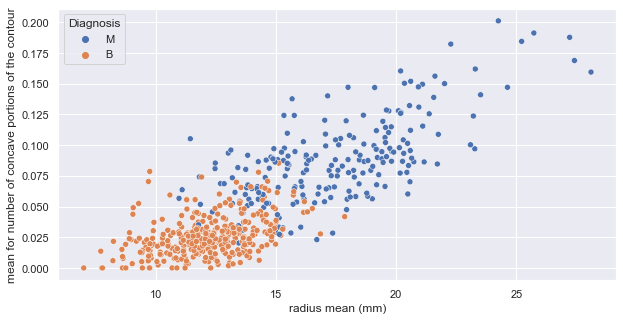

In [45]:
fig = plt.figure(figsize=[10, 5])
sns.scatterplot(x="radius_mean", y="concave points_mean", hue="diagnosis", data=df)
plt.ylabel("mean for number of concave portions of the contour")
plt.xlabel("radius mean (mm)")
plt.legend(title="Diagnosis")
plt.show()

In [8]:
def Bool(string):
    re = 0
    if string == "M":
        re = 1
    elif string != "B": #this shouldn't occur. We want to know if it happens, so we return nan
        re = np.nan #nan throws an error in regression models, so it will let us know if this happened
    return re

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression #random forest performed better than GBoost & logistic Regression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

df_new = df.drop(columns = ['diagnosis'])
df_new['diagnosis'] = [Bool(i) for i in df['diagnosis']]

y = df_new["diagnosis"]
X = df_new.drop(columns = ['diagnosis', "id"]) #remove patient id

rf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf.fit(X_train, y_train)
pred_tr = rf.predict(X_train)
pred_te = rf.predict(X_test)

r2_tr = r2_score(y_train, pred_tr)
r2_te = r2_score(y_test, pred_te)

print("r2 score for training set: ", r2_tr)
print("r2 score for testing set: ", r2_te, "\n")

print("accuracy score for training set: ", accuracy_score(y_train, pred_tr))
print("accuracy score for testing set: ", accuracy_score(y_test, pred_te), "\n")

print("confusion matrices are in the format: ")
print("[[benign,    predicted benign correctly    ",
      " benign,    predicted malignant falsely", " ]")
print(" [malignant, predicted benign falsely      ",
      " malignant, predicted malignant correctly]]", "\n")

print("training set confusion matrix")
print(confusion_matrix(y_train, pred_tr))

print("testing set confusion matrix")
print(confusion_matrix(y_test, pred_te))

r2 score for training set:  1.0
r2 score for testing set:  0.8512276321265085 

accuracy score for training set:  1.0
accuracy score for testing set:  0.965034965034965 

confusion matrices are in the format: 
[[benign,    predicted benign correctly      benign,    predicted malignant falsely  ]
 [malignant, predicted benign falsely        malignant, predicted malignant correctly]] 

training set confusion matrix
[[268   0]
 [  0 158]]
testing set confusion matrix
[[87  2]
 [ 3 51]]


**The model results are good**. on the testing data set, the random forest model predicted 96.5% correctly, and performing well in predicting both benign and malignant tumors, as seen in the confusion matrix.

**With some more data** (we only had 569 patients total), **the model would likely perform even better**.